In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score

In [73]:
training_3=pd.read_excel("data_completed_4.xlsx")

<AxesSubplot:>

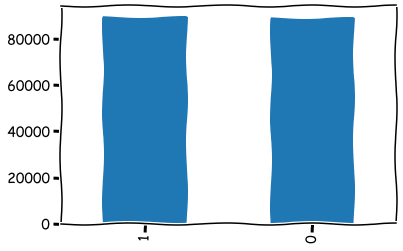

In [74]:
training_3.target.value_counts().plot(kind='bar')

In [75]:
training_3.target.value_counts()

1    89667
0    88914
Name: target, dtype: int64

In [76]:
training_3.columns

Index(['Unnamed: 0', 'Address', 'City', 'Post Code', 'Merged Stops',
       'merged_data', 'merge_data_2', 'target'],
      dtype='object')

In [77]:
training_3['address'] = training_3.apply(lambda x: ''.join(x['merged_data'].lower() + ' ' + str(x['merge_data_2'])), axis=1)


In [78]:
training_3[training_3.target==1]

,Unnamed: 0,Address,City,Post Code,Merged Stops,merged_data,merge_data_2,target,address
0,0,xxxxxxxxxxxxxxxJA BUSINESS UNIT,LOHJA,8150,1,xxxxxxxxxxxxxxxJA BUSINESS UNIT LOHJA 8150,xxxxxxxxxxxxxxxJA BUSINESS UNIT LOHJA 8150,1,xxxxxxxxxxxxxxxja business unit lohja 8150 xxx...
5,5,xxxxxxxxxxxxxINKOJANKAARI 9,TURKU,20320,6,xxxxxxxxxxxxxINKOJANKAARI 9 TURKU 20320,xxxxxxxxxxxxxINKOJANKAARI 9 TURKU 20320,1,xxxxxxxxxxxxxinkojankaari 9 turku 20320 xxxxxx...
6,6,xxxxxxxxxxxxJUUNTIE 17 19,PORI,28360,38,xxxxxxxxxxxxJUUNTIE 17 19 PORI 28360,xxxxxxxxxxxxjuuntie 17-19 Pori 28360 28360,1,xxxxxxxxxxxxjuuntie 17 19 pori 28360 xxxxxxxxx...
9,9,xxxxxxxxxxxxxxASRINTEENTIE 22,ROVANIEMI,96400,4,xxxxxxxxxxxxxxASRINTEENTIE 22 ROVANIEMI 96400,xxxxxxxxxxxxxxASRINTEENTIE 22 ROVANIEMI 96400,1,xxxxxxxxxxxxxxasrinteentie 22 rovaniemi 96400 ...
10,10,xxxxxxxxxxxrmaajantie 6,JYVÄSKYLÄ,40320,2,xxxxxxxxxxxrmaajantie 6 JYVÄSKYLÄ 40320,xxxxxxxxxxxrmaajantie 6 JYVÄSKYLÄ 40320,1,xxxxxxxxxxxrmaajantie 6 jyväskylä 40320 xxxxxx...
...,...,...,...,...,...,...,...,...,...
178576,178576,xxxxxxxxxxxSITIE 8 LEVI,SIRKKA,99130,5,xxxxxxxxxxxSITIE 8 LEVI SIRKKA 99130,xxxxxxxxxxxSITIE 8 LEVI SIRKKA 99130,1,xxxxxxxxxxxsitie 8 levi sirkka 99130 xxxxxxxxx...
178577,178577,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22,LAHTI,15140,2,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 LAHTI 15140,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 LAHTI 15140,1,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 lahti 15...
178578,178578,xxxxxxxxxxxxxxxxxERTINKATU 16 5 KRS,OULU,90100,8,xxxxxxxxxxxxxxxxxERTINKATU 16 5 KRS OULU 90100,xxxxxxxxxxxMIKATU 31-33 OULU 90100,1,xxxxxxxxxxxxxxxxxertinkatu 16 5 krs oulu 90100...
178579,178579,xxxxxxxxxxxjauksentie 2,Riihimaki 11100,11100,2,xxxxxxxxxxxjauksentie 2 Riihimaki 11100 11100,xxxxxxxxxxxJAUKSENTIE 2 RIIHIMÄKI 11120,1,xxxxxxxxxxxjauksentie 2 riihimaki 11100 11100 ...


In [79]:
training_3=shuffle(training_3)

In [80]:
training_3=training_3.reset_index().drop(['index'],1)

In [81]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(training_3["address"].values)
from sklearn.preprocessing import MaxAbsScaler
max_abs_transformer = MaxAbsScaler().fit(X)
training_data_tfidf = max_abs_transformer.transform(X)

In [82]:
,target=training_3.target

In [83]:
#TF-IDF Vectorizer
seed = 123
np.random.seed(seed)
x_train2,x_test2,y_train2,y_test2=train_test_split(training_data_tfidf,target,test_size=.25,random_state=seed)

In [84]:
log_obj_TFIDF=LogisticRegression()

In [85]:
log_obj_TFIDF.fit(x_train2,y_train2)

LogisticRegression()

In [86]:
pred_tfidf=log_obj_TFIDF.predict(x_test2)

In [87]:
accuracy_score(y_test2,pred_tfidf) #..........................TFIDF ACCURACY..........................

0.9613403216413564

In [130]:
x_test_new = pd.Series(["sak"])
print(type(x_test_new))

X = tfidf.transform(x_test_new)
new_test_tfidf = max_abs_transformer.transform(X)

print(type(new_test_tfidf))
print(new_test_tfidf.shape)

<class 'pandas.core.series.Series'>
<class 'scipy.sparse.csr.csr_matrix'>
(1, 11157)


In [89]:
log_obj_TFIDF.predict(new_test_tfidf)

array([1], dtype=int64)

In [90]:
# vectorizer = CountVectorizer()
# X_count = vectorizer.fit_transform(training_3["address"])

# from sklearn.preprocessing import MaxAbsScaler
# transformer = MaxAbsScaler().fit(X_count)
# training_data_count = transformer.transform(X_count)

In [60]:
# training_data_tfidf

<178581x11157 sparse matrix of type '<class 'numpy.float64'>'
	with 1067996 stored elements in Compressed Sparse Row format>

In [62]:
#CountVectorizer
# seed = 123
# np.random.seed(seed)
# x_train,x_test,y_train,y_test=train_test_split(training_data_count,target,test_size=.25,random_state=seed)

In [64]:
# log_obj_count=LogisticRegression()

In [67]:
# log_obj_count.fit(x_train,y_train)

LogisticRegression()

In [69]:
# pred_count=log_obj_count.predict(x_test)

In [70]:
# pred_tfidf,x_test2

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 <44646x11157 sparse matrix of type '<class 'numpy.float64'>'
 	with 267090 stored elements in Compressed Sparse Row format>)

In [72]:
accuracy_score(y_test,pred_count)    #.............................COUNT vect accuracy.......................

0.746718631008377

In [73]:
# checking overvfitting and underfitting
print(X_count.shape)

(178581, 11157)


In [74]:
print(x_test2.shape[0])

44646


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test2,pred_tfidf))
print(classification_report(y_test2,pred_tfidf))
print(accuracy_score(y_test2,pred_tfidf))

[[21769   558]
 [ 1088 21231]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     22327
           1       0.97      0.95      0.96     22319

    accuracy                           0.96     44646
   macro avg       0.96      0.96      0.96     44646
weighted avg       0.96      0.96      0.96     44646

0.9631321954934373


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred_count))
print(classification_report(y_test,pred_count))
print(accuracy_score(y_test,pred_count))

[[18180  4147]
 [ 7169 15150]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     22327
           1       0.79      0.68      0.73     22319

    accuracy                           0.75     44646
   macro avg       0.75      0.75      0.75     44646
weighted avg       0.75      0.75      0.75     44646

0.7465394436231689


In [30]:
# def predict_car(s,train=training_3,model=log_obj_TFIDF):
#     pred=model.predict(training_data_tfidf_)
#     print(train.target[pred_tfidf[0]])
#     return train.target[pred_tfidf[0]]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [32]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(x_train2, y_train2)
# Number of folds for cross validation
num_folds = 7

In [33]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

In [34]:
num_folds = 7

In [35]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()

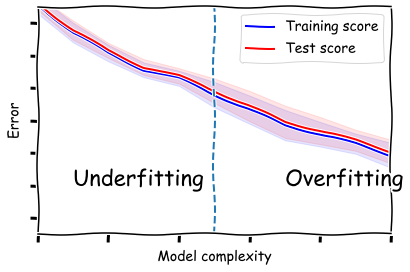

In [36]:
plot_validation_curve(clf_1, x_train2, y_train2, param_name='max_depth', param_range=range(2,13))


In [37]:
mod=RandomForestClassifier()
mod.fit(x_train2,y_train2)
pred=mod.predict(x_test2)
accuracy_score(y_test2,pred)

0.9941316131344353

In [ ]:
traININ

In [121]:
j=training_3[training_3.target==0]
j.address.values[0]

'xxxxxxxikka 1 f esbo finland 2630 xxxxxxxxxxxxaharjuntie 49 OULU 90540'

In [39]:
x_test2

<44646x11157 sparse matrix of type '<class 'numpy.float64'>'
	with 267370 stored elements in Compressed Sparse Row format>

In [93]:
testing=pd.read_excel("combined_data.xls")

In [94]:
testing['merged']=np.nan

In [95]:
for i in range(len(testing)):
    testing['merged'][i]=str(testing.Address[i])+" "+str(testing.City[i])+" "+str(testing['Post Code'][i])

In [96]:
testing['merged_2']=np.nan

In [97]:
for i in range(len(testing)):
    testing['merged_2'][i]=str(testing.Address[i])+" "+str(testing.City[i])+" "+str(testing['Post Code'][i])

In [98]:
testing

,Transport Task,Shipment Number,Name,Address,City,Post Code,Merged Stops,Stop Number Without Merge,merged,merged_2
0,246889402,xxxxxxxxxxxxx0437,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxekki,xxxxxxxxxxxeriönkatu 32,LAHTI,15200,5,5,xxxxxxxxxxxeriönkatu 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 LAHTI 15200
1,246889402,xxxxxxxxxxxxx6746,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160
2,246889402,xxxxxxxxxxxxx7687,xxxxxxxxxxxxxxxxxxxxxxxxxxA OY,xxxxxxxxxxxERIÖNKATU 32,LAHTI,15200,5,5,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200
3,246889402,xxxxxxxxxxxxx8693,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160
4,246889402,xxxxxxxxxxxxx3148,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160
...,...,...,...,...,...,...,...,...,...,...
188,246889454,xxxxxxxxxxxxx4675,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550
189,246889454,xxxxxxxxxxxxx4656,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550
190,246889454,xxxxxxxxxxxxx8697,xxxxxxxxxxxxT OY,xxxxxxxxxxxJAMÄENTIE 19,LEMPÄÄLÄ,37550,1,1,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550
191,246889454,xxxxxxxxxxxxx1163,xxxxxxxxB KY,xxxxxxxxxxxxHOMAJANKATU 5,VALKEAKOSKI,37600,6,8,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600


In [99]:
testing

,Transport Task,Shipment Number,Name,Address,City,Post Code,Merged Stops,Stop Number Without Merge,merged,merged_2
0,246889402,xxxxxxxxxxxxx0437,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxekki,xxxxxxxxxxxeriönkatu 32,LAHTI,15200,5,5,xxxxxxxxxxxeriönkatu 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 LAHTI 15200
1,246889402,xxxxxxxxxxxxx6746,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160
2,246889402,xxxxxxxxxxxxx7687,xxxxxxxxxxxxxxxxxxxxxxxxxxA OY,xxxxxxxxxxxERIÖNKATU 32,LAHTI,15200,5,5,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200
3,246889402,xxxxxxxxxxxxx8693,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160
4,246889402,xxxxxxxxxxxxx3148,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160
...,...,...,...,...,...,...,...,...,...,...
188,246889454,xxxxxxxxxxxxx4675,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550
189,246889454,xxxxxxxxxxxxx4656,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550
190,246889454,xxxxxxxxxxxxx8697,xxxxxxxxxxxxT OY,xxxxxxxxxxxJAMÄENTIE 19,LEMPÄÄLÄ,37550,1,1,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550
191,246889454,xxxxxxxxxxxxx1163,xxxxxxxxB KY,xxxxxxxxxxxxHOMAJANKATU 5,VALKEAKOSKI,37600,6,8,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600


In [7]:
import os
os.getcwd().split('\\')

['C:', 'Users', '1741710', 'Desktop', 'Delhi_work', 'Logistic_Data']

In [102]:
testing['address'] = testing.apply(lambda x: ''.join(x['merged'].lower() + ' ' + str(x['merged_2'])), axis=1)


In [104]:
testing.address[0]

'xxxxxxxxxxxeriönkatu 32 lahti 15200 xxxxxxxxxxxeriönkatu 32 LAHTI 15200'

In [103]:
testing

,Transport Task,Shipment Number,Name,Address,City,Post Code,Merged Stops,Stop Number Without Merge,merged,merged_2,address
0,246889402,xxxxxxxxxxxxx0437,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxekki,xxxxxxxxxxxeriönkatu 32,LAHTI,15200,5,5,xxxxxxxxxxxeriönkatu 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 lahti 15200 xxxxxxxxxx...
1,246889402,xxxxxxxxxxxxx6746,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 lahti 15160 xxxxxxxxxx...
2,246889402,xxxxxxxxxxxxx7687,xxxxxxxxxxxxxxxxxxxxxxxxxxA OY,xxxxxxxxxxxERIÖNKATU 32,LAHTI,15200,5,5,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 lahti 15200 xxxxxxxxxx...
3,246889402,xxxxxxxxxxxxx8693,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 lahti 15160 xxxxxxxxxx...
4,246889402,xxxxxxxxxxxxx3148,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 lahti 15160 xxxxxxxxxx...
...,...,...,...,...,...,...,...,...,...,...,...
188,246889454,xxxxxxxxxxxxx4675,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxaparkinkatu 4 lempäälä 37550 xxxxx...
189,246889454,xxxxxxxxxxxxx4656,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxaparkinkatu 4 lempäälä 37550 xxxxx...
190,246889454,xxxxxxxxxxxxx8697,xxxxxxxxxxxxT OY,xxxxxxxxxxxJAMÄENTIE 19,LEMPÄÄLÄ,37550,1,1,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550,xxxxxxxxxxxjamäentie 19 lempäälä 37550 xxxxxxx...
191,246889454,xxxxxxxxxxxxx1163,xxxxxxxxB KY,xxxxxxxxxxxxHOMAJANKATU 5,VALKEAKOSKI,37600,6,8,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600,xxxxxxxxxxxxhomajankatu 5 valkeakoski 37600 xx...


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
import pickle

In [133]:
with open("random_forest_model.pkl",'rb') as file:
    loaded_model=pickle.load(file)
    

In [135]:
testing

,Transport Task,Shipment Number,Name,Address,City,Post Code,Merged Stops,Stop Number Without Merge,merged,merged_2,address
0,246889402,xxxxxxxxxxxxx0437,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxekki,xxxxxxxxxxxeriönkatu 32,LAHTI,15200,5,5,xxxxxxxxxxxeriönkatu 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 lahti 15200 xxxxxxxxxx...
1,246889402,xxxxxxxxxxxxx6746,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 lahti 15160 xxxxxxxxxx...
2,246889402,xxxxxxxxxxxxx7687,xxxxxxxxxxxxxxxxxxxxxxxxxxA OY,xxxxxxxxxxxERIÖNKATU 32,LAHTI,15200,5,5,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200,xxxxxxxxxxxERIÖNKATU 32 LAHTI 15200,xxxxxxxxxxxeriönkatu 32 lahti 15200 xxxxxxxxxx...
3,246889402,xxxxxxxxxxxxx8693,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 lahti 15160 xxxxxxxxxx...
4,246889402,xxxxxxxxxxxxx3148,xxxxxxxxxxxisma,xxxxxxxxxxxppiaankatu 2,LAHTI,15160,7,7,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 LAHTI 15160,xxxxxxxxxxxppiaankatu 2 lahti 15160 xxxxxxxxxx...
...,...,...,...,...,...,...,...,...,...,...,...
188,246889454,xxxxxxxxxxxxx4675,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxaparkinkatu 4 lempäälä 37550 xxxxx...
189,246889454,xxxxxxxxxxxxx4656,xxxxxxxxxxxxPARK,xxxxxxxxxxxxAPARKINKATU 4,LEMPÄÄLÄ,37550,2,2,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxAPARKINKATU 4 LEMPÄÄLÄ 37550,xxxxxxxxxxxxaparkinkatu 4 lempäälä 37550 xxxxx...
190,246889454,xxxxxxxxxxxxx8697,xxxxxxxxxxxxT OY,xxxxxxxxxxxJAMÄENTIE 19,LEMPÄÄLÄ,37550,1,1,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550,xxxxxxxxxxxJAMÄENTIE 19 LEMPÄÄLÄ 37550,xxxxxxxxxxxjamäentie 19 lempäälä 37550 xxxxxxx...
191,246889454,xxxxxxxxxxxxx1163,xxxxxxxxB KY,xxxxxxxxxxxxHOMAJANKATU 5,VALKEAKOSKI,37600,6,8,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600,xxxxxxxxxxxxHOMAJANKATU 5 VALKEAKOSKI 37600,xxxxxxxxxxxxhomajankatu 5 valkeakoski 37600 xx...


In [134]:
for index in range(len(test_df)-1):
    if index not in similar_found:
        address_1 = test_df.loc[index, 'address']
        for j in range(index+1,len(test_df)):
            if j not in similar_found:
                address_2 = test_df.loc[j, 'address']
                test_features=loaded_transformer.transform([address_1 + ' ' + address_2])
                prediction = loaded_model.predict(test_features)
                print(address_1, 'and', address_2, '----> prediction is', prediction[0])
                if prediction[0] == 1:
                    similar_found.add(index)
                    similar_found.add(j)
                    if index not in similar_address_dict.keys():
                        similar_address_dict[index] = [j]
                    else:
                        similar_address_dict[index].append(j)

NameError: name 'test_df' is not defined